In [1]:

import importlib
import numpy as np
from mesa.experimental import SolaraViz

from scripts.agents.orders import Order
from scripts.agents.riders import Rider
from scripts import delivering
from animation.utils import agent_portrayal, plot_lines

In [2]:
np.random.seed(19)
num_riders = 2
max_t = 30
num_orders = 2

orders = [
    Order(
        id=i,
        creation_at=0,#(i+1)*1,
        restaurant_address=(3, 3),
        customer_address=(0, i*2),
    )
    for i in range(num_orders)
]

riders = [ 
    Rider(
        id=1, 
        shift_start_at=0, 
        shift_end_at=5,
        starting_point=(0,0)
        )
        for _ in range(num_riders)
        ]

model_params={
        "bag_limit": 2,
        "max_t": max_t,
        "dim": 10,
        "orders": orders,
        "riders":riders,
        "slowness": 1 # Slider(
    #     "Slowness", value=10, min=1, max=20, step=1
    # ),
    }


In [3]:
model= delivering.Dispatcher(**model_params)
for i in range(max_t):
    model.step()
df = model.datacollector.get_model_vars_dataframe()

/Users/gaby/Github/simulations/.venv/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/gaby/Github/simulations/.venv/lib/python3.12/site-packages/numpy/_core/_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


,riders_in_shift,riders_idle,riders_going_to_vendor,riders_going_to_customer,riders_doing_overtime,orders_created,orders_assigned,orders_delivered,orders_waiting,delivery_time_cum,delivery_time,queue_size,bag_size,orders_assigned_cum,orders_picked_up_cum,orders_delivered_cum
0,2,1,1,0,0,2,2,0,0,NaN,NaN,2.0,NaN,2,0,0
1,2,1,1,0,0,0,0,0,0,NaN,NaN,2.0,NaN,2,0,0
2,2,1,1,0,0,0,0,0,0,NaN,NaN,2.0,NaN,2,0,0
3,2,1,1,0,0,0,0,0,0,NaN,NaN,2.0,NaN,2,0,0
4,2,1,1,0,0,0,0,0,0,NaN,NaN,2.0,NaN,2,0,0
5,0,0,1,0,1,0,0,0,0,NaN,NaN,2.0,NaN,2,0,0
6,0,0,0,1,1,0,0,0,0,NaN,NaN,NaN,2.0,2,2,0
7,0,0,0,1,1,0,0,1,0,7.0,7.0,NaN,1.0,2,2,1
8,0,0,0,1,1,0,0,0,0,NaN,7.0,NaN,1.0,2,2,1
9,0,0,0,1,1,0,0,0,0,NaN,7.0,NaN,1.0,2,2,1


<Axes: >

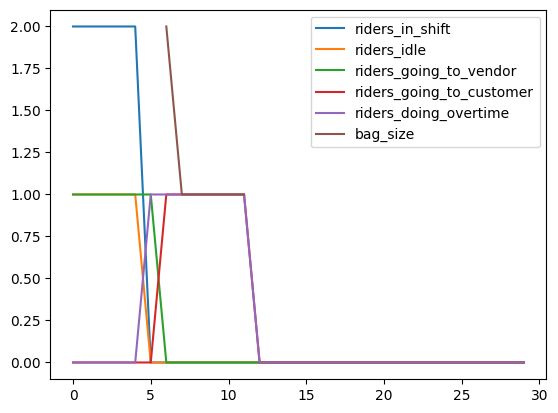

In [4]:
display(df)
df[[c for c in df.columns if "rider" in c or "bag" in c]].plot()

/Users/gaby/Github/simulations/.venv/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/gaby/Github/simulations/.venv/lib/python3.12/site-packages/numpy/_core/_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


,riders_in_shift,riders_idle,riders_going_to_vendor,riders_going_to_customer,riders_doing_overtime,orders_created,orders_assigned,orders_delivered,orders_waiting,delivery_time_cum,delivery_time,queue_size,bag_size,orders_assigned_cum,orders_picked_up_cum,orders_delivered_cum
0,10,10,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,0,0,0
1,10,7,3,0,0,5,5,0,0,NaN,NaN,1.666667,NaN,5,0,0
2,10,5,5,0,0,5,5,0,0,NaN,NaN,2.000000,NaN,10,0,0


<Axes: >

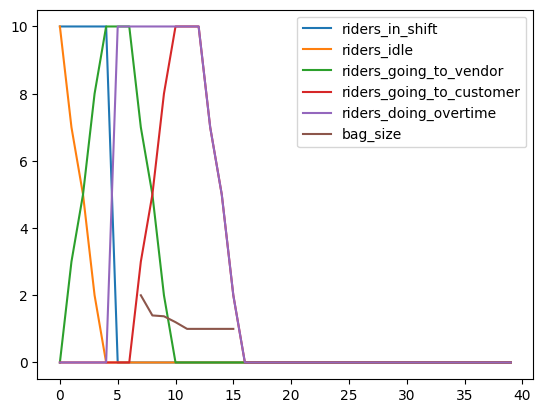

In [5]:
np.random.seed(19)
num_riders = 10
max_t = 40
num_orders = 50

orders = [
    Order(
        id=i,
        creation_at=(i//5+1)*1,
        restaurant_address=(3, 3),
        customer_address=(0, 2),
    )
    for i in range(num_orders)
]
riders = [ 
    Rider(
        id=1, 
        shift_start_at=0, 
        shift_end_at=5,
        starting_point=(0,0)
        )
        for _ in range(num_riders)
        ]

model_params={
        "bag_limit": 2,
        "max_t": max_t,
        "dim": 10,
        "orders": orders,
        "riders":riders,
        "slowness": 1 # Slider(
    #     "Slowness", value=10, min=1, max=20, step=1
    # ),
    }
model= delivering.Dispatcher(**model_params)
for i in range(max_t):
    model.step()
df = model.datacollector.get_model_vars_dataframe()
display(df[:3])
df[[c for c in df.columns if "rider" in c or "bag" in c]].plot()

In [6]:
viz = SolaraViz(
    model_class=delivering.Dispatcher,
    #components=[Graph],
    model_params=model_params,
    name="Dispatcher",
    play_interval=10,
    agent_portrayal=agent_portrayal,
    measures=["delivery_time", "orders_assigned", "bag_size", "queue_size", "riders_idle", "riders_going_to_vendor", "orders_picked_up_cum", "orders_delivered"],
  
)

viz

Cannot show ipywidgets in text

In [12]:
importlib.reload(delivering)

np.random.seed(19)

# TODO do a function to convert a list of quantities of orders into orders ->
# for each i, will create as many orders as are in the list[i]

_orders = [0, 20, 40, 100, 110, 90, 50, 0, 0]*2
_riders = [0, 3, 5, 8, 20, 10, 5, 7, 0]*2
max_t = len(_orders) + 7



orders = [
    Order(
        id=sum(_orders[:t])+i,
        creation_at=t,
        restaurant_address=(3, 3),
        customer_address=(0, 2),
        preparation_time=q%2,
    )
    for t, q in enumerate(_orders) 
    for i in range(q)
]
riders = [ 
    Rider(
        id=i, 
        shift_start_at=t, 
        shift_end_at=min(t+7, max_t),
        starting_point=(0,0)
    )
    for t, q in enumerate(_riders) 
    for i in range(q)
        ]

model_params={
        "bag_limit": 5,
        "max_t": max_t,
        "dim": 10,
        "orders": orders,
        "riders":riders,
        "slowness": 1 # Slider(
    #     "Slowness", value=10, min=1, max=20, step=1
    # ),
    }
model= delivering.Dispatcher(**model_params)
for i in range(max_t+10):
    model.step()
df = model.datacollector.get_model_vars_dataframe()

display(df[:10])
display(df[-10:])



/Users/gaby/Github/simulations/.venv/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/gaby/Github/simulations/.venv/lib/python3.12/site-packages/numpy/_core/_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Max simulation steps reached!
Max simulation steps reached!
Max simulation steps reached!
Max simulation steps reached!
Max simulation steps reached!
Max simulation steps reached!
Max simulation steps reached!
Max simulation steps reached!
Max simulation steps reached!


,riders_in_shift,riders_idle,riders_going_to_vendor,riders_going_to_customer,riders_doing_overtime,orders_created,orders_assigned,orders_delivered,orders_waiting,delivery_time_cum,delivery_time,queue_size,bag_size,orders_assigned_cum,orders_picked_up_cum,orders_delivered_cum
0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,0,0,0
1,3,0,3,0,0,20,15,0,5,NaN,NaN,5.0,NaN,15,0,0
2,8,0,8,0,0,40,25,0,20,NaN,NaN,5.0,NaN,40,0,0
3,16,0,16,0,0,100,40,0,80,NaN,NaN,5.0,NaN,80,0,0
4,36,0,36,0,0,110,100,0,90,NaN,NaN,5.0,NaN,180,0,0
5,46,0,46,0,0,90,50,0,130,NaN,NaN,5.0,NaN,230,0,0
6,51,0,51,0,0,50,25,0,155,NaN,NaN,5.0,NaN,255,0,0
7,58,0,55,3,0,0,35,0,120,NaN,NaN,5.0,5.000,290,15,0
8,55,0,50,8,3,0,0,3,120,7.0,7.000,5.0,4.625,290,40,3
9,50,0,42,16,8,0,0,5,120,7.2,7.125,5.0,4.500,290,80,8


,riders_in_shift,riders_idle,riders_going_to_vendor,riders_going_to_customer,riders_doing_overtime,orders_created,orders_assigned,orders_delivered,orders_waiting,delivery_time_cum,delivery_time,queue_size,bag_size,orders_assigned_cum,orders_picked_up_cum,orders_delivered_cum
25,0,0,0,55,55,0,0,36,240,17.833333,13.666667,NaN,3.072727,580,580,411
26,0,0,0,50,50,0,0,43,240,17.558140,14.035242,NaN,2.520000,580,580,454
27,0,0,0,42,42,0,0,43,240,17.744186,14.356137,NaN,1.976190,580,580,497
28,0,0,0,22,22,0,0,42,240,17.476190,14.599258,NaN,1.863636,580,580,539
29,0,0,0,12,12,0,0,22,240,16.909091,14.689840,NaN,1.583333,580,580,561
30,0,0,0,7,7,0,0,12,240,17.833333,14.755672,NaN,1.000000,580,580,573
31,0,0,0,0,0,0,0,7,240,18.714286,14.803448,NaN,NaN,580,580,580
32,0,0,0,0,0,0,0,0,240,NaN,14.803448,NaN,NaN,580,580,580
33,0,0,0,0,0,0,0,0,240,NaN,14.803448,NaN,NaN,580,580,580
34,0,0,0,0,0,0,0,0,240,NaN,14.803448,NaN,NaN,580,580,580


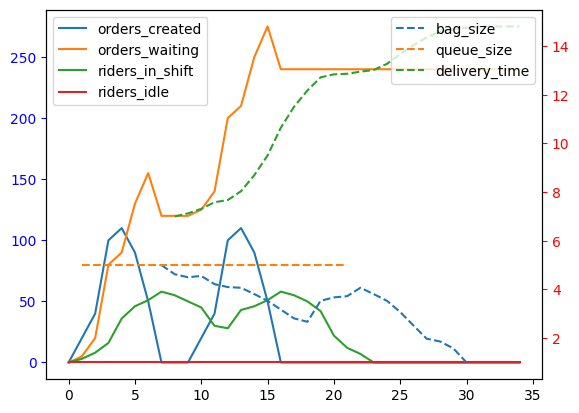

In [13]:
cols1 = [
    ["orders_created", "orders_waiting", "riders_in_shift", "riders_idle"], 
    ["bag_size", "queue_size", "delivery_time"]
    ]
plot_lines(df, cols1)